# HR Analytics: Job Change of Data Scientists

### Features:

* enrollee_id : Unique ID for enrollee
* city: City code
* citydevelopmentindex: Developement index of the city (scaled)
* gender: Gender of enrolee
* relevent_experience: Relevent experience of enrolee
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of enrolee
* major_discipline :Education major discipline of enrolee
* experience: Enrolee total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


## Data Preprocessing

### Missing values

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64


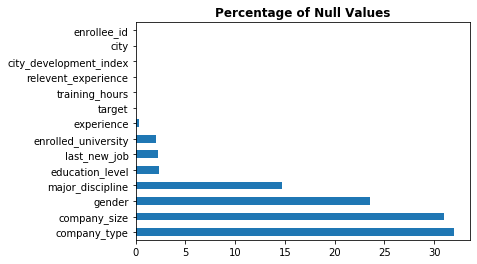

In [5]:
missing_values = (train.isnull().sum()/len(train))*100
print(missing_values)

missing_values.sort_values(ascending=False).plot(kind='barh')
plt.title('Percentage of Null Values',weight='bold')
plt.show()

### Null values imputation

**1. enrollee_id**

In [6]:
print('Number of Unique Values:',train['enrollee_id'].nunique())

Number of Unique Values: 19158


* enrollee_id - all are unique values, so drop it or set it as index

In [7]:
train.set_index('enrollee_id',inplace=True)
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


**2. city**

In [8]:
print('Number of Unique Values:',train['city'].nunique())
print('Number of Null Values:',train['city'].isnull().sum())

print('Top 10 cities:') 
print((train['city'].value_counts()[0:10]))

Number of Unique Values: 123
Number of Null Values: 0
Top 10 cities:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
Name: city, dtype: int64


**3. city_development_index**

In [9]:
print("Number of Missing Values: ",train['city_development_index'].isnull().sum())

Number of Missing Values:  0


**4. gender**

In [10]:
print("Number of Missing Values: ", train['gender'].isnull().sum())

Number of Missing Values:  4508


In [11]:
train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

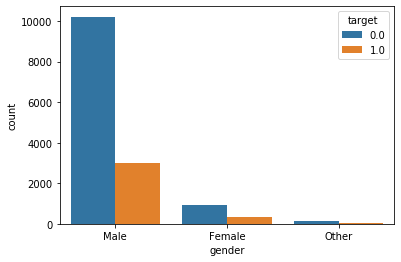

In [12]:
# Analysing Target on the Bases of Gender

sns.countplot(train['gender'],hue=train['target'])
plt.show()

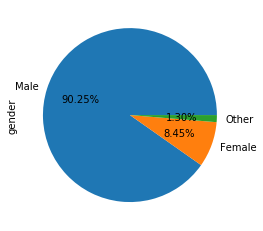

In [13]:
train['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

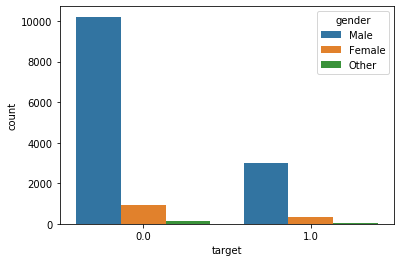

In [14]:
sns.countplot(train['target'],hue=train['gender'])
plt.show()

* From the above, we can say that the data is gender bias as there are more number of Male
* From the plot, we analyse that the percentage of males are more for Not Looking for Job Change


* So we can drop the feature

In [15]:
train.drop('gender',axis=1,inplace=True)

**5. relevent_experience**

In [16]:
print("Number of Missing Values:",train['relevent_experience'].isnull().sum())

Number of Missing Values: 0


In [17]:
train['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

**6. enrolled_university**

In [18]:
print("Number of Missing Values:",train['enrolled_university'].isnull().sum())

Number of Missing Values: 386


In [19]:
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

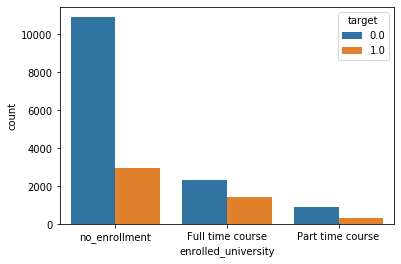

In [20]:
sns.countplot(train['enrolled_university'],hue=train['target'])
plt.show()

* Most of candidates has no enrollment are more likely not looking for a job change


* We can't assume that the missing data is left out or the candidates had no enrollment, but also we don't want to create a new value (like 'OTHER') because it can create a pattern that doesn't exist.


* So fill the missing values with the no_enrollment value

In [21]:
train["enrolled_university"] = train["enrolled_university"].fillna('no_enrollment')

**7. education_level**

In [22]:
print("Number of Missing Values:",train['education_level'].isnull().sum())

Number of Missing Values: 460


In [23]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

* Most candidates are graduates


* Let us consider "education_level" as "Other" which are not mentioned (null values)

In [24]:
train["education_level"] = train["education_level"].fillna('Other')

In [25]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Other               460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

**8. major_discipline**

In [26]:
print("Number of Missing Values:",train['major_discipline'].isnull().sum())

Number of Missing Values: 2813


In [27]:
train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

* Most of the candidates are STEM majors


* Let us consider "major_discipline" as "No Major" which are not mentioned (null values)

In [28]:
train['major_discipline'] = train['major_discipline'].fillna('No Major')

In [29]:
train['major_discipline'].value_counts()

STEM               14492
No Major            3036
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

**9. experience**

In [30]:
print("Number of Missing Values:",train['experience'].isnull().sum())

Number of Missing Values: 65


In [31]:
train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

* Let us consider "experience" as "0" which are not mentioned (null values)

In [32]:
train['experience'] = train['experience'].fillna(0)

In [33]:
train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 0],
      dtype=object)

* The experience variable is an object indicating the minimum or maximum years of experience a candidate has, so deleting the operators won't make a big difference

In [34]:
# First convert the column to string

train['experience'] = train['experience'].astype(str)

In [35]:
train['experience'] = train['experience'].apply(lambda x: x.replace('>20','21'))
train['experience'] = train['experience'].apply(lambda x: x.replace('<1','0'))

In [36]:
train['experience'] = train['experience'].astype(int)

In [37]:
train['experience'].unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20])

**10. company_size**

In [38]:
print("Number of Missing Values:",train['company_size'].isnull().sum())

Number of Missing Values: 5938


In [39]:
train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [40]:
train['company_size'].isnull().sum()/len(train)*100

30.994884643490973

In [41]:
train[train['company_size'].isnull()]['experience'].value_counts()

21    917
3     599
4     563
2     548
5     483
6     349
0     314
7     311
1     281
9     237
10    208
8     202
11    154
15    130
14    112
16    103
12     98
13     79
17     77
19     68
18     64
20     41
Name: experience, dtype: int64

* Hence 31% of candidates didn't mention the company_size but they have experience, so we will assume that these candidates has not mentioned the company_size


* So fill null values as "not_mentioned"

In [42]:
train['company_size'] = train['company_size'].fillna('not_mentioned')

In [43]:
train['company_size'].unique()

array(['not_mentioned', '50-99', '<10', '10000+', '5000-9999',
       '1000-4999', '10/49', '100-500', '500-999'], dtype=object)

In [44]:
train['company_size'] = train['company_size'].astype(str)

train['company_size'] = train['company_size'].map(lambda x: x.replace('/','-'))

In [45]:
train['company_size'].unique()

array(['not_mentioned', '50-99', '<10', '10000+', '5000-9999',
       '1000-4999', '10-49', '100-500', '500-999'], dtype=object)

**11. company_type**

In [46]:
print("Number of Missing Values:",train['company_type'].isnull().sum())

Number of Missing Values: 6140


In [47]:
train['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

* Most of candidates work in Private limited company type (pvt ltd)

In [48]:
train['company_type'].isnull().sum()/len(train)*100

32.04927445453596

In [49]:
train[train['company_type'].isnull()]['experience'].value_counts()

21    920
3     590
4     582
2     547
5     503
6     383
0     327
7     321
1     282
9     244
10    229
8     211
11    167
15    144
12    118
14    113
16    111
13     86
17     81
18     71
19     67
20     43
Name: experience, dtype: int64

* Hence 32% of candidates didn't mention the company_type but they have experience, so we will assume that these candidates has not mentioned the company_type


* So fill null values as "not_mentioned"

In [50]:
train['company_type'] = train['company_type'].fillna('not_mentioned')

In [51]:
train['company_type'].unique()

array(['not_mentioned', 'Pvt Ltd', 'Funded Startup',
       'Early Stage Startup', 'Other', 'Public Sector', 'NGO'],
      dtype=object)

**12. last_new_job**

In [52]:
print("Number of Missing Values:", train['last_new_job'].isnull().sum())

Number of Missing Values: 423


In [53]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

* Let us consider the missing values are from candidates whose has no job

In [54]:
train['last_new_job'] = train['last_new_job'].fillna('never')

In [55]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

**13. training_hours**

In [56]:
print("Number of Missing Values:", train['training_hours'].isnull().sum())

Number of Missing Values: 0


**14. target**

In [57]:
print("Number of Missing Values: ",train['target'].isnull().sum())

Number of Missing Values:  0


#### Check for missing values after null values imputation

In [58]:
train.isnull().sum()

city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### city vs city_development_index

In [59]:
train[['city','city_development_index']].drop_duplicates().head()

,city,city_development_index
enrollee_id,,
8949,city_103,0.920
29725,city_40,0.776
11561,city_21,0.624
33241,city_115,0.789
666,city_162,0.767


* From the above, we can see that each city has specific city_development_index, so deleting this column won't make any difference to the model

In [60]:
train.drop('city',axis=1,inplace=True)

## Data Visualization

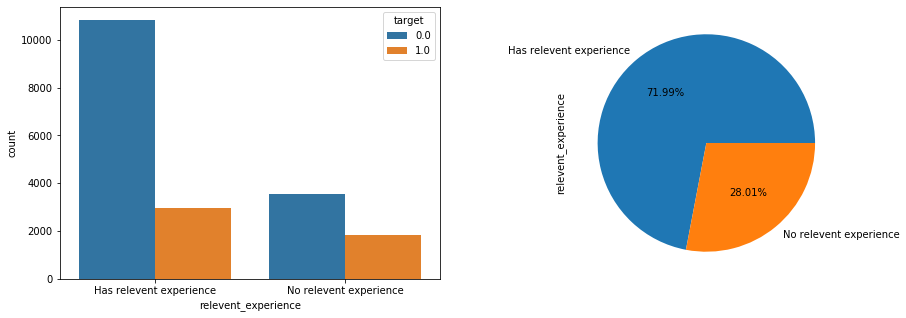

In [61]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(train['relevent_experience'],hue=train['target'],ax=axes[0])
train['relevent_experience'].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axes[1])
plt.show()

* Most of the candidates has relevant experience

* Candidates with relevant experience are not looking for a job change

* Candidates with no relevant experience are more keen to change job

* 72% employees has relevent experience and around 11k employees are not looking for job change

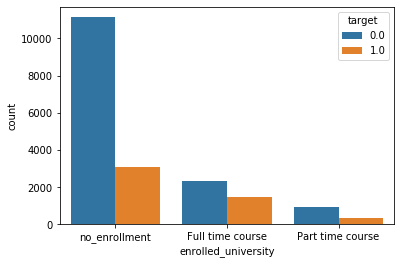

In [62]:
sns.countplot(train['enrolled_university'],hue=train['target'])
plt.show()

* Most of the candidates are having no enrollment in any university and those without any enrollment have no interest in changing their job

* Part Time course enrolled candidates are very less and they also don't want to change

* Full time enrolled are not very much looking for jobs but in proportion they have higher chance of changing the job than others

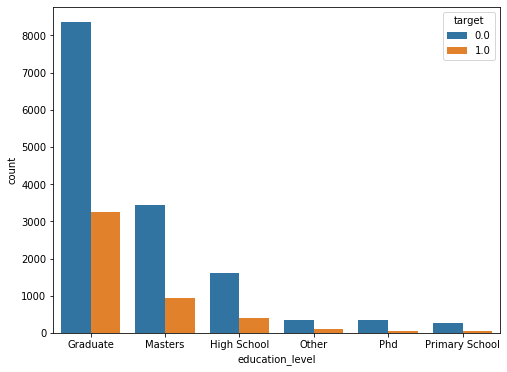

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(train['education_level'],hue=train['target'])
plt.show()

* Graduates have very less chance of leaving

* In every education level , there is a very less chance of changing job

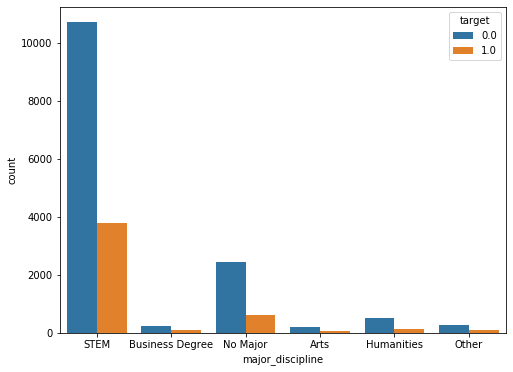

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(train['major_discipline'],hue=train['target'])
plt.show()

* Mostly candidates are STEM and not looking to change the job in any discipline

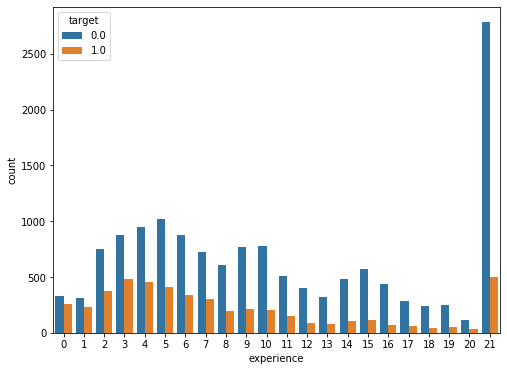

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(train['experience'],hue=train['target'])
plt.show()

* Candidates who have experience less than 1 year have more tendency to change their job while those with more than 20 years of experience have very less tendency of changing jobz

* As experience increases, tendency to change the job becomes less

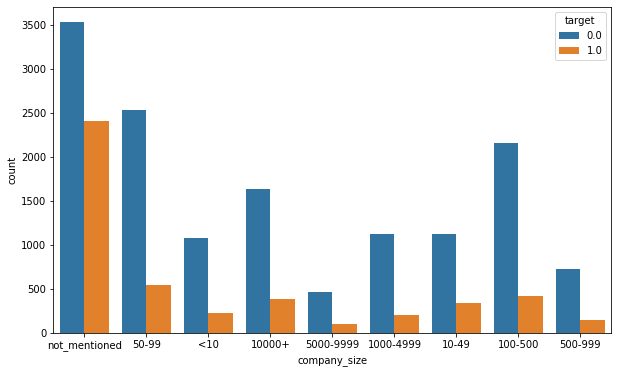

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(train['company_size'],hue=train['target'])
plt.show()

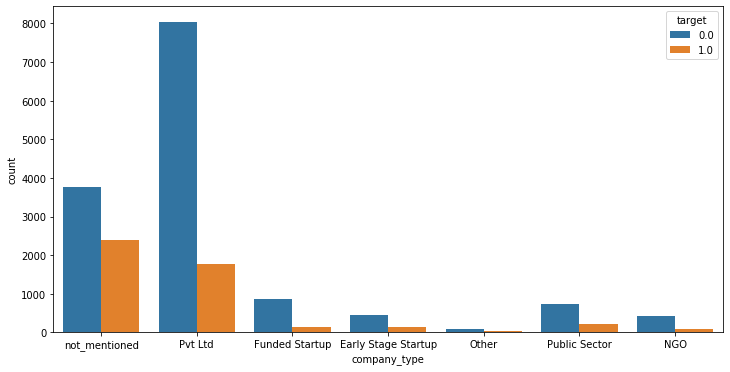

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(train['company_type'],hue=train['target'])
plt.show()

* All company type shows candidates do not leave the company after training

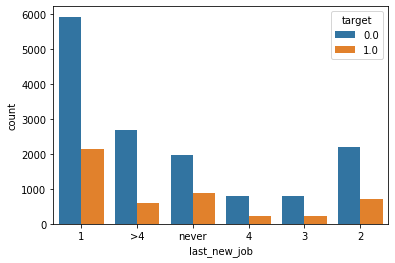

In [68]:
sns.countplot(train['last_new_job'],hue=train['target'])
plt.show()

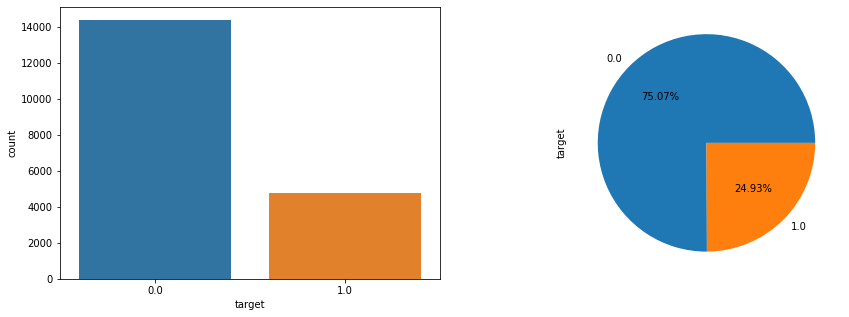

In [69]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(train['target'],ax=axes[0])
train['target'].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axes[1])
plt.show()

* So , probablity is higher that a person will not change job
* From the above two plots, we can see that data is imbalance and there are approx 75% of employees who are not looking for job change

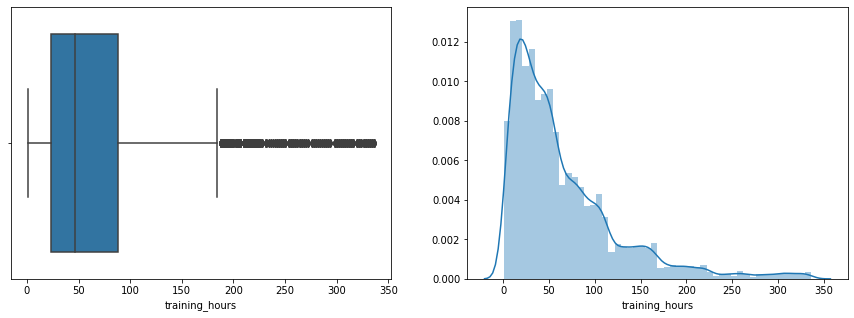

In [70]:
# Training Hour Distribution

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(train['training_hours'],ax=axes[0])
sns.distplot(train['training_hours'],ax=axes[1])
plt.show()

* Training Hour is right skewed and having outliers

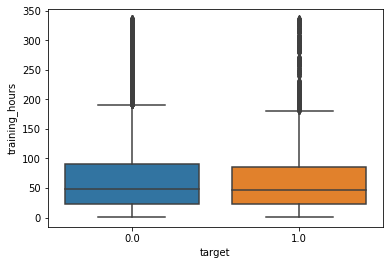

In [71]:
sns.boxplot(data=train,x='target',y='training_hours')
plt.show()

* From the plot, we can see that the number of hours used to train a candidate don't actually contribute a lot to the decision to change the fields for the candidate

* There is no much difference between training hours of those who are wishing to change and those who are not

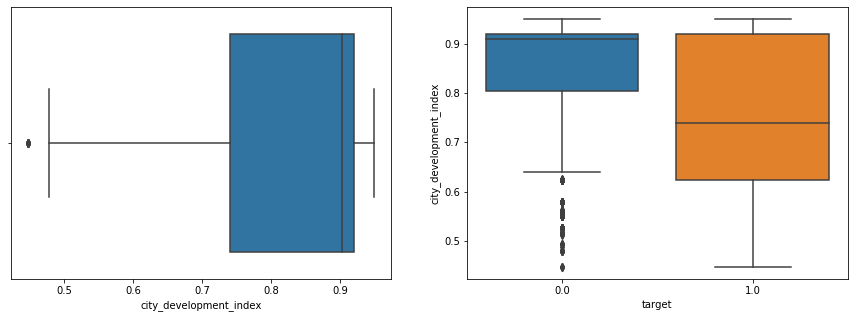

In [72]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(train['city_development_index'],ax=axes[0])
sns.boxplot(data=train,x='target',y='city_development_index',ax=axes[1])
plt.show()

* Most of the people who are not changing jobs are from city with high development index so basically they are having a comfortable life in respective city are not willing to change jobs

* People in cities with less development index looks to change their jobs maybe for better life style

### Encoding categorical data

In [73]:
train1 = train.copy()

In [74]:
train1.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,
8949,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,not_mentioned,not_mentioned,1,36,1.0
29725,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,0.624,No relevent experience,Full time course,Graduate,STEM,5,not_mentioned,not_mentioned,never,83,0.0
33241,0.789,No relevent experience,no_enrollment,Graduate,Business Degree,0,not_mentioned,Pvt Ltd,never,52,1.0
666,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [75]:
train1['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [76]:
train1['relevent_experience'] = train1['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [77]:
train1['relevent_experience'].unique()

array([1, 0], dtype=int64)

In [78]:
train1['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [79]:
train1['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Other', 'Phd',
       'Primary School'], dtype=object)

In [80]:
train1['major_discipline'].unique()

array(['STEM', 'Business Degree', 'No Major', 'Arts', 'Humanities',
       'Other'], dtype=object)

In [81]:
train1['company_size'].unique()

array(['not_mentioned', '50-99', '<10', '10000+', '5000-9999',
       '1000-4999', '10-49', '100-500', '500-999'], dtype=object)

In [82]:
train1['company_type'].unique()

array(['not_mentioned', 'Pvt Ltd', 'Funded Startup',
       'Early Stage Startup', 'Other', 'Public Sector', 'NGO'],
      dtype=object)

In [83]:
train1['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [84]:
train1['last_new_job'] = train1['last_new_job'].replace({'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5})

In [85]:
train1['last_new_job'].unique()

array([1, 5, 0, 4, 3, 2], dtype=int64)

In [86]:
train1 = pd.get_dummies(train1)

In [87]:
train1.head()

,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,...,company_size_5000-9999,company_size_<10,company_size_not_mentioned,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_not_mentioned
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,0.920,1,21,1,36,1.0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
29725,0.776,0,15,5,47,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
11561,0.624,0,5,0,83,0.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
33241,0.789,0,0,0,52,1.0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
666,0.767,1,21,4,8,0.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


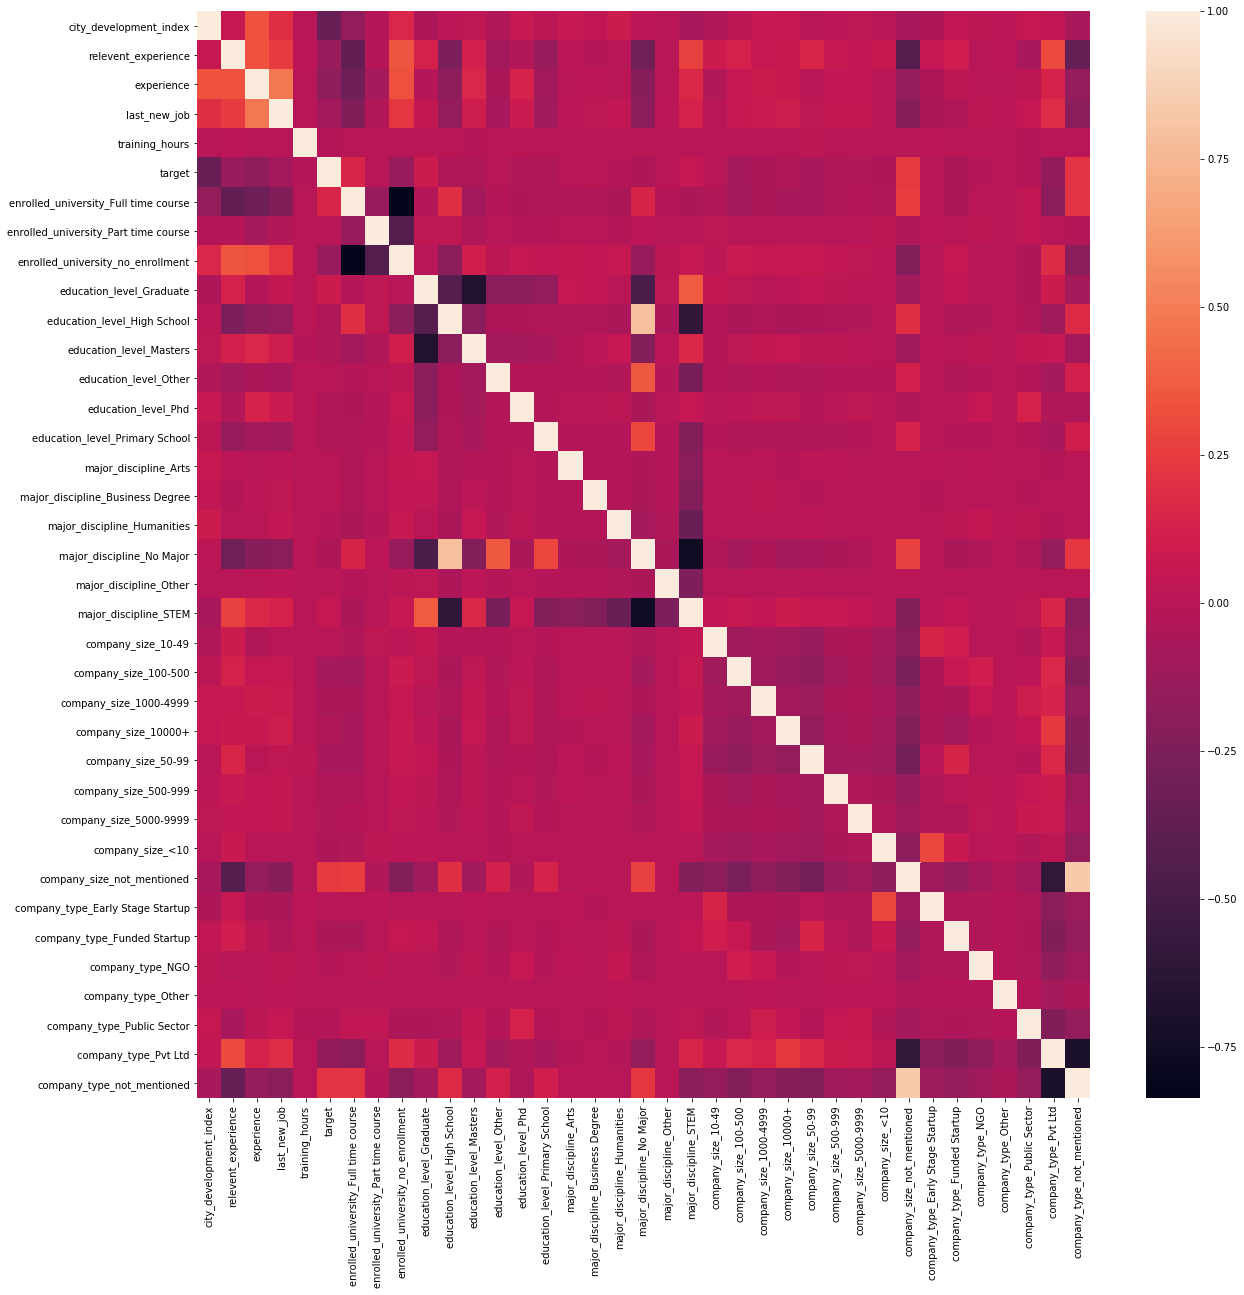

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(train1.corr())
plt.show()

In [89]:
x = train1.drop('target',1)
y = train1['target']

In [90]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [91]:
xtrain.shape

(13410, 36)

In [92]:
xtest.shape

(5748, 36)

In [93]:
ytrain.shape

(13410,)

In [94]:
ytest.shape

(5748,)

#### Using Anova test to check both train and test data represents the overall data


* Null hypothesis: Train and test data represents the overall data
* Alternate hypothesis: Train and test data doesn't represents the overall data

In [95]:
from scipy.stats import f_oneway

f_oneway(y,ytrain,ytest)

F_onewayResult(statistic=0.0010366797589089485, pvalue=0.9989638574360394)

* Since, P value > 0.05, we accept null hypothesis
* Hence, train and test data represents the overall data

### Fitting a base model

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

In [98]:
base_mod = LogisticRegression()
base_mod.fit(xtrain_sc,ytrain)

ytest_pred = base_mod.predict(xtest_sc)

In [99]:
print('Confusion Matrix:')
confusion_matrix(ytest,ytest_pred)

Confusion Matrix:


array([[4031,  285],
       [1051,  381]], dtype=int64)

In [100]:
print('Classification report:')
print(classification_report(ytest,ytest_pred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      4316
         1.0       0.57      0.27      0.36      1432

    accuracy                           0.77      5748
   macro avg       0.68      0.60      0.61      5748
weighted avg       0.74      0.77      0.73      5748



In [101]:
print('Overall accuracy:',accuracy_score(ytest,ytest_pred))

Overall accuracy: 0.767571329157968


* Accuracy is good to start with and can be improved further by tuning and refitting the model

In [102]:
print('Precision score:',precision_score(ytest,ytest_pred))
print('Recall score   :',recall_score(ytest,ytest_pred))
print('F1 score       :',f1_score(ytest,ytest_pred))

Precision score: 0.5720720720720721
Recall score   : 0.26606145251396646
F1 score       : 0.3632030505243088


In [103]:
print('Cohen’s Kappa Value:',cohen_kappa_score(ytest,ytest_pred))

Cohen’s Kappa Value: 0.24355607040272353


ROC AUC Score: 0.7814946399262716


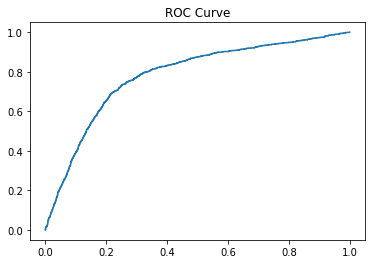

In [104]:
yprob = base_mod.predict_proba(xtest_sc)[:,1]

print('ROC AUC Score:',roc_auc_score(ytest,yprob))
fpr,tpr,th = roc_curve(ytest,yprob)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

### Treating imbalance data

In [105]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [106]:
y.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [107]:
len(y)

19158

In [108]:
count_class_0 = 10381
count_class_1 = 8777

pipe = make_pipeline(SMOTE(sampling_strategy={1:count_class_1}),NearMiss(sampling_strategy={0:count_class_0}))
inp, out = pipe.fit_resample(x,y)

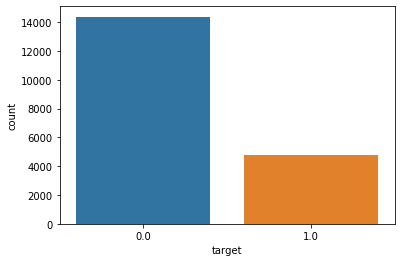

In [109]:
sns.countplot(y)
plt.show()

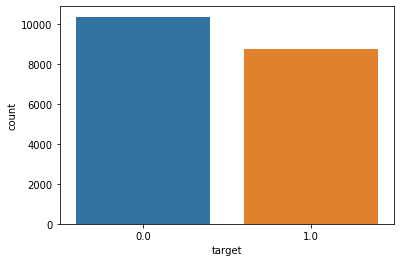

In [110]:
sns.countplot(out)
plt.show()

### After treating imbalance data

In [111]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(inp,out,test_size=0.3,random_state=10)

In [112]:
sc = StandardScaler()
xtrain_sc1 = sc.fit_transform(xtrain1)
xtest_sc1 = sc.transform(xtest1)

In [113]:
base_mod1 = LogisticRegression()
base_mod1.fit(xtrain_sc1,ytrain1)

ytest_pred1 = base_mod1.predict(xtest_sc1)

In [114]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ytest_pred1)

Confusion Matrix:


array([[2673,  447],
       [ 872, 1756]], dtype=int64)

In [115]:
print('Classification report:')
print(classification_report(ytest1,ytest_pred1))

Classification report:
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      3120
         1.0       0.80      0.67      0.73      2628

    accuracy                           0.77      5748
   macro avg       0.78      0.76      0.76      5748
weighted avg       0.77      0.77      0.77      5748



### Re-fitting the model

#### Comparing with other classification models:

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from xgboost import XGBClassifier

In [117]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [118]:
clf1 = LogisticRegression(max_iter=3000)
clf2 = RandomForestClassifier(random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = GaussianNB()
clf5 = XGBClassifier(random_state=0)

In [119]:
print('Accuracy scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='accuracy')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

Accuracy scores of the models
LR: 0.77 0.0
RF: 0.79 0.01
KNN: 0.76 0.01
GNB: 0.68 0.01
[10:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

In [120]:
print('ROC AUC scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='roc_auc')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

ROC AUC scores of the models
LR: 0.86 0.01
RF: 0.86 0.01
KNN: 0.83 0.01
GNB: 0.75 0.01
[10:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

### Final model:

* By comparing the accuracy, XGBoost Classifier model is the best model


* ROC AUC is also better for XGBoost Classifier model where it results how well the model is able to predict the classes correctly

In [121]:
best_mod = XGBClassifier(random_state=0)
best_mod.fit(xtrain_sc1,ytrain1)
ypred = best_mod.predict(xtest_sc1)

[10:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [122]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ypred)

Confusion Matrix:


array([[2530,  590],
       [ 519, 2109]], dtype=int64)

In [123]:
print('Classification report:')
print(classification_report(ytest1,ypred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      3120
         1.0       0.78      0.80      0.79      2628

    accuracy                           0.81      5748
   macro avg       0.81      0.81      0.81      5748
weighted avg       0.81      0.81      0.81      5748



In [124]:
print('Overall accuracy:',round(accuracy_score(ytest1,ypred),2))
print('Precision score :',round(precision_score(ytest1,ypred),2))
print('Recall score    :',round(recall_score(ytest1,ypred),2))
print('F1 score        :',round(f1_score(ytest1,ypred),2))

Overall accuracy: 0.81
Precision score : 0.78
Recall score    : 0.8
F1 score        : 0.79


ROC AUC Score: 0.8805170159622215


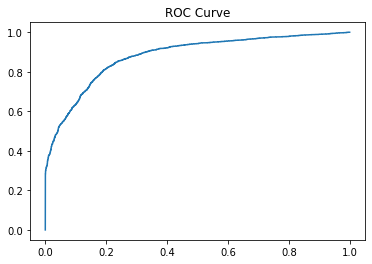

In [125]:
yprob1 = best_mod.predict_proba(xtest_sc1)[:,1]

print('ROC AUC Score:',roc_auc_score(ytest1,yprob1))
fpr,tpr,th = roc_curve(ytest1,yprob1)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

In [126]:
best_mod

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Tuning hyperparameters:

In [127]:
param = {'n_estimators':[100, 120, 150],
         'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015],
         'gamma':[2, 3, 4, 5, 6],
         'max_depth':[2, 3, 4, 5, 6],
         'objective': ["binary:logistic"],
         'eval_metric' :["logloss"]}

In [128]:
xgb = XGBClassifier()
hyp_tune = GridSearchCV(xgb,param_grid=param,cv=kf,scoring='accuracy')
best_param = hyp_tune.fit(xtrain_sc1,ytrain1)

In [129]:
best_param.best_params_

{'eval_metric': 'logloss',
 'gamma': 3,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 150,
 'objective': 'binary:logistic'}

In [130]:
final_params = best_param.best_params_
final_params

{'eval_metric': 'logloss',
 'gamma': 3,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 150,
 'objective': 'binary:logistic'}

In [131]:
final_mod = XGBClassifier(**final_params)
final_mod.fit(xtrain_sc1,ytrain1)
ypred1 = final_mod.predict(xtest_sc1)

In [132]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ypred1)

Confusion Matrix:


array([[2497,  623],
       [ 467, 2161]], dtype=int64)

In [133]:
print('Classification report:')
print(classification_report(ytest1,ypred1))

Classification report:
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      3120
         1.0       0.78      0.82      0.80      2628

    accuracy                           0.81      5748
   macro avg       0.81      0.81      0.81      5748
weighted avg       0.81      0.81      0.81      5748



In [134]:
print('Overall accuracy:',round(accuracy_score(ytest1,ypred1),2))
print('Precision score :',round(precision_score(ytest1,ypred1),2))
print('Recall score    :',round(recall_score(ytest1,ypred1),2))
print('F1 score        :',round(f1_score(ytest1,ypred1),2))

Overall accuracy: 0.81
Precision score : 0.78
Recall score    : 0.82
F1 score        : 0.8


ROC AUC Score: 0.8818907817195489


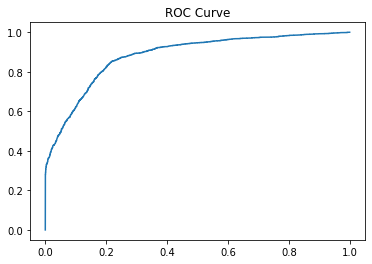

In [135]:
yprob2 = final_mod.predict_proba(xtest_sc1)[:,1]

print('ROC AUC Score:',roc_auc_score(ytest1,yprob2))
fpr,tpr,th = roc_curve(ytest1,yprob2)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

### Feature selection

In [136]:
final_mod.feature_importances_

array([0.05143535, 0.03580321, 0.01029851, 0.01099854, 0.01065364,
       0.03478601, 0.07637646, 0.01915174, 0.01994913, 0.02567487,
       0.02188604, 0.01279812, 0.0399315 , 0.01519056, 0.01499178,
       0.00909106, 0.01158294, 0.07544947, 0.0149885 , 0.01254672,
       0.01824062, 0.03133841, 0.02150664, 0.01777981, 0.02788744,
       0.01549451, 0.01313437, 0.02341853, 0.05676096, 0.03358714,
       0.04463961, 0.01444206, 0.0056367 , 0.02450108, 0.11389632,
       0.0141516 ], dtype=float32)

In [137]:
xgb_features = pd.DataFrame({'Features':xtrain.columns,'Feature_importance':final_mod.feature_importances_})
xgb_features.sort_values('Feature_importance',ascending=False)

,Features,Feature_importance
34,company_type_Pvt Ltd,0.113896
6,enrolled_university_Part time course,0.076376
17,major_discipline_No Major,0.075449
28,company_size_not_mentioned,0.056761
0,city_development_index,0.051435
30,company_type_Funded Startup,0.044640
12,education_level_Phd,0.039931
1,relevent_experience,0.035803
5,enrolled_university_Full time course,0.034786
29,company_type_Early Stage Startup,0.033587


In [138]:
best_feat = list(xgb_features[xgb_features['Feature_importance']>0.04]['Features'])
best_feat

['city_development_index',
 'enrolled_university_Part time course',
 'major_discipline_No Major',
 'company_size_not_mentioned',
 'company_type_Funded Startup',
 'company_type_Pvt Ltd']

In [139]:
xtrain_sc11 = pd.DataFrame(xtrain_sc1,columns=xtrain1.columns)
xtrain_sc11[best_feat].head()

,city_development_index,enrolled_university_Part time course,major_discipline_No Major,company_size_not_mentioned,company_type_Funded Startup,company_type_Pvt Ltd
0,-0.833972,-0.211659,2.710118,-0.751992,-0.197411,-0.896726
1,-0.833972,-0.211659,-0.368988,-0.751992,-0.197411,1.115168
2,0.874401,-0.211659,-0.368988,-0.751992,-0.197411,1.115168
3,0.920573,-0.211659,-0.368988,-0.751992,-0.197411,1.115168
4,0.874401,-0.211659,-0.368988,-0.751992,-0.197411,-0.896726


In [140]:
xtest_sc11 = pd.DataFrame(xtest_sc1,columns=xtest1.columns)
xtest_sc11[best_feat].head()

,city_development_index,enrolled_university_Part time course,major_discipline_No Major,company_size_not_mentioned,company_type_Funded Startup,company_type_Pvt Ltd
0,0.874401,-0.211659,-0.368988,1.329802,-0.197411,-0.896726
1,-0.133693,-0.211659,-0.368988,1.329802,-0.197411,-0.896726
2,-1.403430,-0.211659,-0.368988,-0.751992,-0.197411,1.115168
3,-0.347316,-0.211659,-0.368988,1.329802,-0.197411,-0.896726
4,-1.403430,-0.211659,-0.368988,1.329802,-0.197411,-0.896726


In [141]:
final_mod1 = XGBClassifier(**final_params)
final_mod1.fit(xtrain_sc11[best_feat],ytrain1)
ypred11 = final_mod1.predict(xtest_sc11[best_feat])

In [142]:
print('Confusion Matrix:')
confusion_matrix(ytest1,ypred11)

Confusion Matrix:


array([[2473,  647],
       [ 555, 2073]], dtype=int64)

In [143]:
print('Classification report:')
print(classification_report(ytest1,ypred11))

Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      3120
         1.0       0.76      0.79      0.78      2628

    accuracy                           0.79      5748
   macro avg       0.79      0.79      0.79      5748
weighted avg       0.79      0.79      0.79      5748



In [144]:
print('Overall accuracy:',round(accuracy_score(ytest1,ypred11),2))
print('Precision score :',round(precision_score(ytest1,ypred11),2))
print('Recall score    :',round(recall_score(ytest1,ypred11),2))
print('F1 score        :',round(f1_score(ytest1,ypred11),2))

Overall accuracy: 0.79
Precision score : 0.76
Recall score    : 0.79
F1 score        : 0.78


ROC AUC Score: 0.8529794398587207


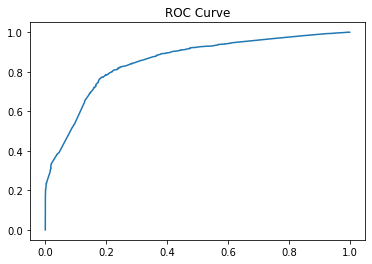

In [145]:
yprob11 = final_mod1.predict_proba(xtest_sc11[best_feat])[:,1]

print('ROC AUC Score:',roc_auc_score(ytest1,yprob11))
fpr,tpr,th = roc_curve(ytest1,yprob11)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()

-----------------------------------------------------------------------------------

## city_development_index vs target

In [146]:
city = pd.crosstab(train['city_development_index'],train['target'])
city

target,0.0,1.0
city_development_index,,
0.448,6,11
0.479,13,15
0.487,1,4
0.493,6,7
0.512,2,3
...,...,...
0.924,273,28
0.925,147,24
0.926,1203,133


In [147]:
city['Ratio of attrition'] = city[1.0] / (city[0.0]+city[1.0])
city.head()

target,0.0,1.0,Ratio of attrition
city_development_index,,,
0.448,6,11,0.647059
0.479,13,15,0.535714
0.487,1,4,0.800000
0.493,6,7,0.538462
0.512,2,3,0.600000


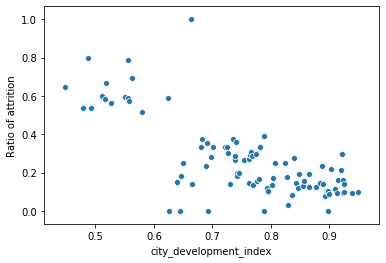

In [148]:
sns.scatterplot(city.index,city['Ratio of attrition'])
plt.show()

* Ratio of attrition is high for employees in city having less city development index

--------------------------------------------------------------------------------------------